In [1]:
pip install yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
import yfinance as yf
from datetime import datetime

tech_list = ['TSLA','AAPL', 'GOOG', 'MSFT', 'AMZN']

start = '2013-01-02'
end =  '2021-06-30'
# end = datetime.now()
# start = datetime(end.year - 5, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download( stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
company_list = [TSLA, AAPL, GOOG, MSFT, AMZN ]
company_name = ['TESLA', "APPLE", "GOOGLE", "MICROSOFT", "AMAZON" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000,TESLA
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000,TESLA
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000,TESLA
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000,TESLA
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000,TESLA
2013-01-09,2.267333,2.279333,2.226667,2.242667,2.242667,10470000,TESLA
2013-01-10,2.258000,2.266000,2.225333,2.235333,2.235333,13837500,TESLA
2013-01-11,2.269333,2.269333,2.140667,2.194000,2.194000,23448000,TESLA
2013-01-14,2.205333,2.225333,2.190000,2.217333,2.217333,13876500,TESLA


In [5]:
# Summary Stats
TSLA.loc[:'2020-01-01', :].describe(), TSLA.loc['2020-01-01':, :].describe()

(              Open         High          Low        Close    Adj Close  \
 count  1762.000000  1762.000000  1762.000000  1762.000000  1762.000000   
 mean     15.920185    16.193254    15.636141    15.924631    15.924631   
 std       5.177829     5.246810     5.104560     5.181118     5.181118   
 min       2.205333     2.225333     2.140667     2.194000     2.194000   
 25%      13.476167    13.717500    13.266667    13.500333    13.500333   
 50%      15.759667    16.073668    15.487000    15.813667    15.813667   
 75%      19.932833    20.306667    19.566333    19.938667    19.938667   
 max      29.000000    29.020666    28.423332    28.729334    28.729334   
 
              Volume  
 count  1.762000e+03  
 mean   1.036155e+08  
 std    6.920068e+07  
 min    6.603000e+06  
 25%    6.011175e+07  
 50%    8.633850e+07  
 75%    1.244040e+08  
 max    5.574585e+08  ,
              Open        High         Low       Close   Adj Close  \
 count  376.000000  376.000000  376.000000  3

In [6]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2013-01-02 to 2021-06-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2138 non-null   float64
 1   High          2138 non-null   float64
 2   Low           2138 non-null   float64
 3   Close         2138 non-null   float64
 4   Adj Close     2138 non-null   float64
 5   Volume        2138 non-null   int64  
 6   company_name  2138 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 198.2+ KB


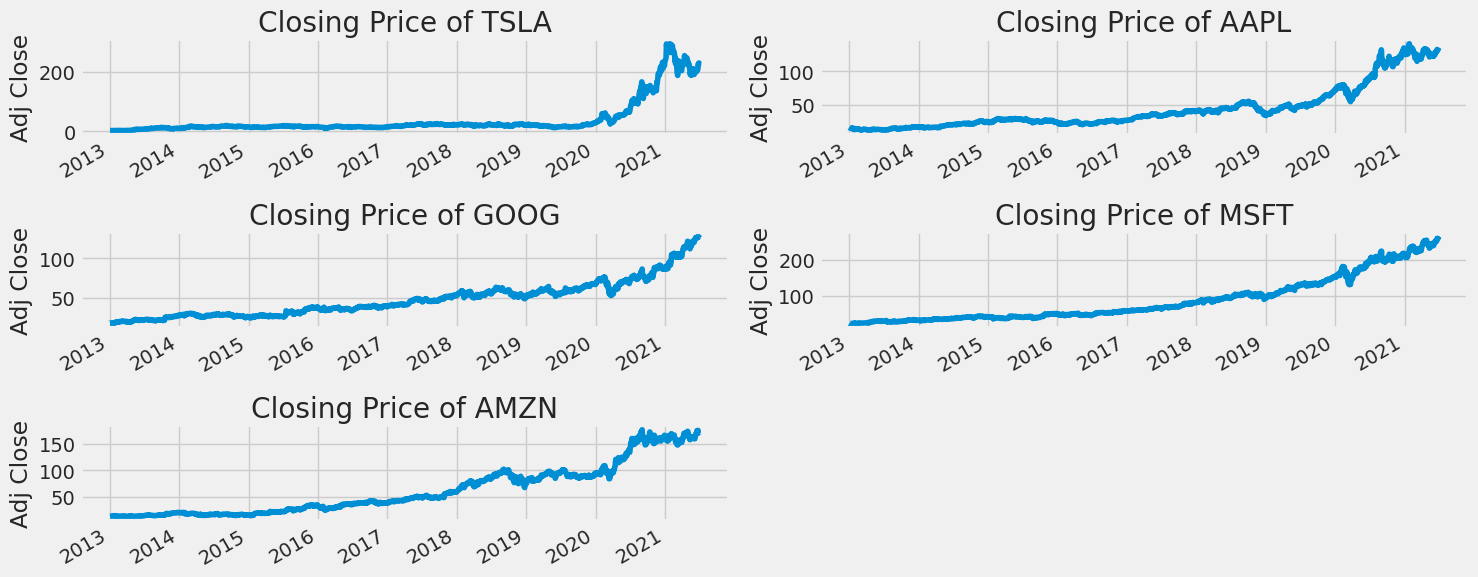

In [7]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

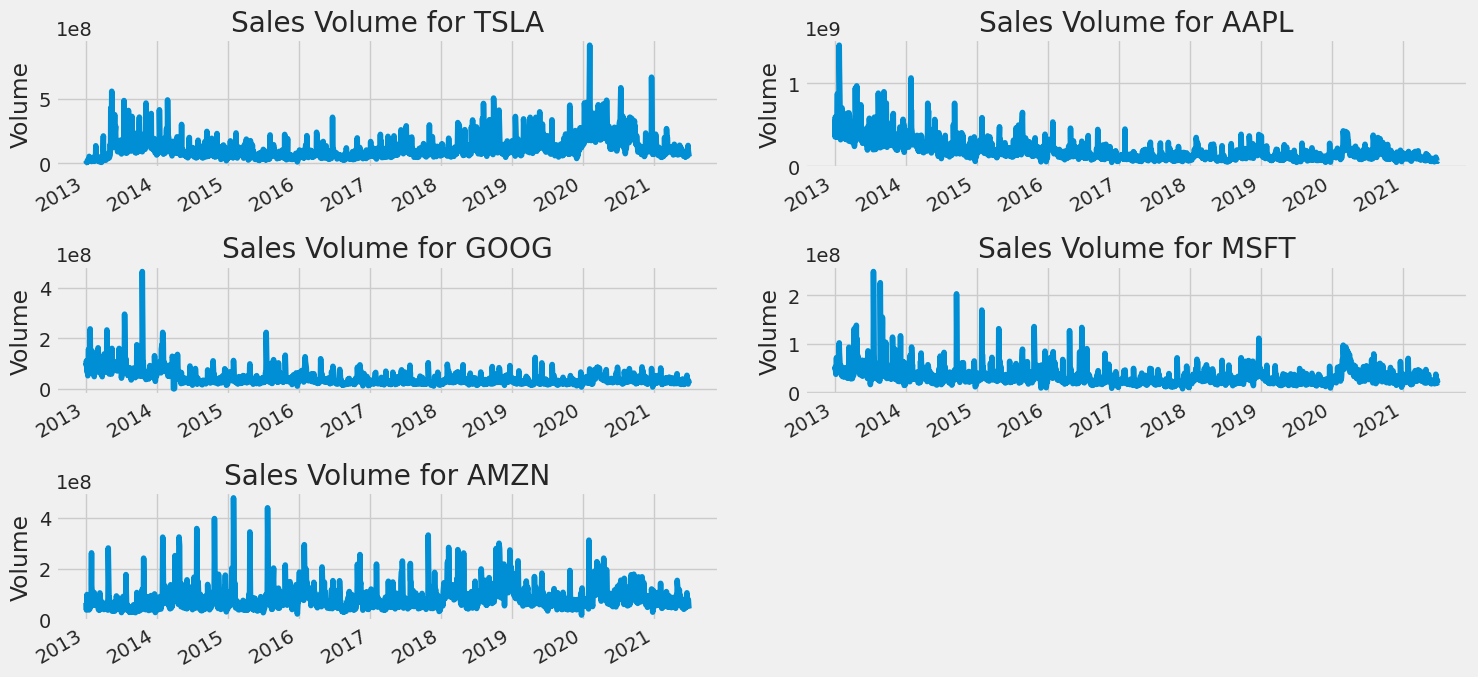

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

2. What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


Now let's go ahead and plot all the additional Moving Averages

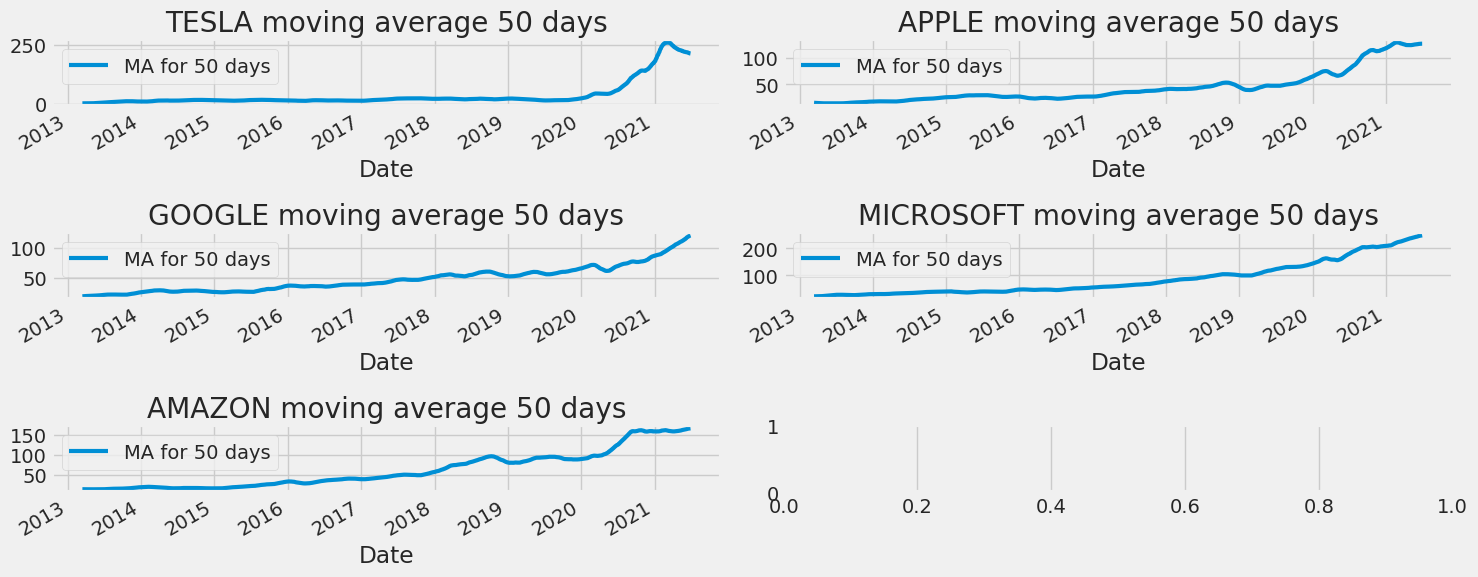

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(15)

TSLA[['MA for 50 days']].plot(ax=axes[0,0], linewidth=3)
axes[0,0].set_title('TESLA moving average 50 days')

AAPL[['MA for 50 days']].plot(ax=axes[0,1], linewidth=3)
axes[0,1].set_title('APPLE moving average 50 days')


GOOG[['MA for 50 days']].plot(ax=axes[1,0], linewidth=3)
axes[1,0].set_title('GOOGLE moving average 50 days')

MSFT[['MA for 50 days']].plot(ax=axes[1,1], linewidth=3)
axes[1,1].set_title('MICROSOFT moving average 50 days')

AMZN[['MA for 50 days']].plot(ax=axes[2,0], linewidth=3)
axes[2,0].set_title('AMAZON moving average 50 days')



fig.tight_layout()

3. What was the daily return of the stock on average?
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Tesla stock.

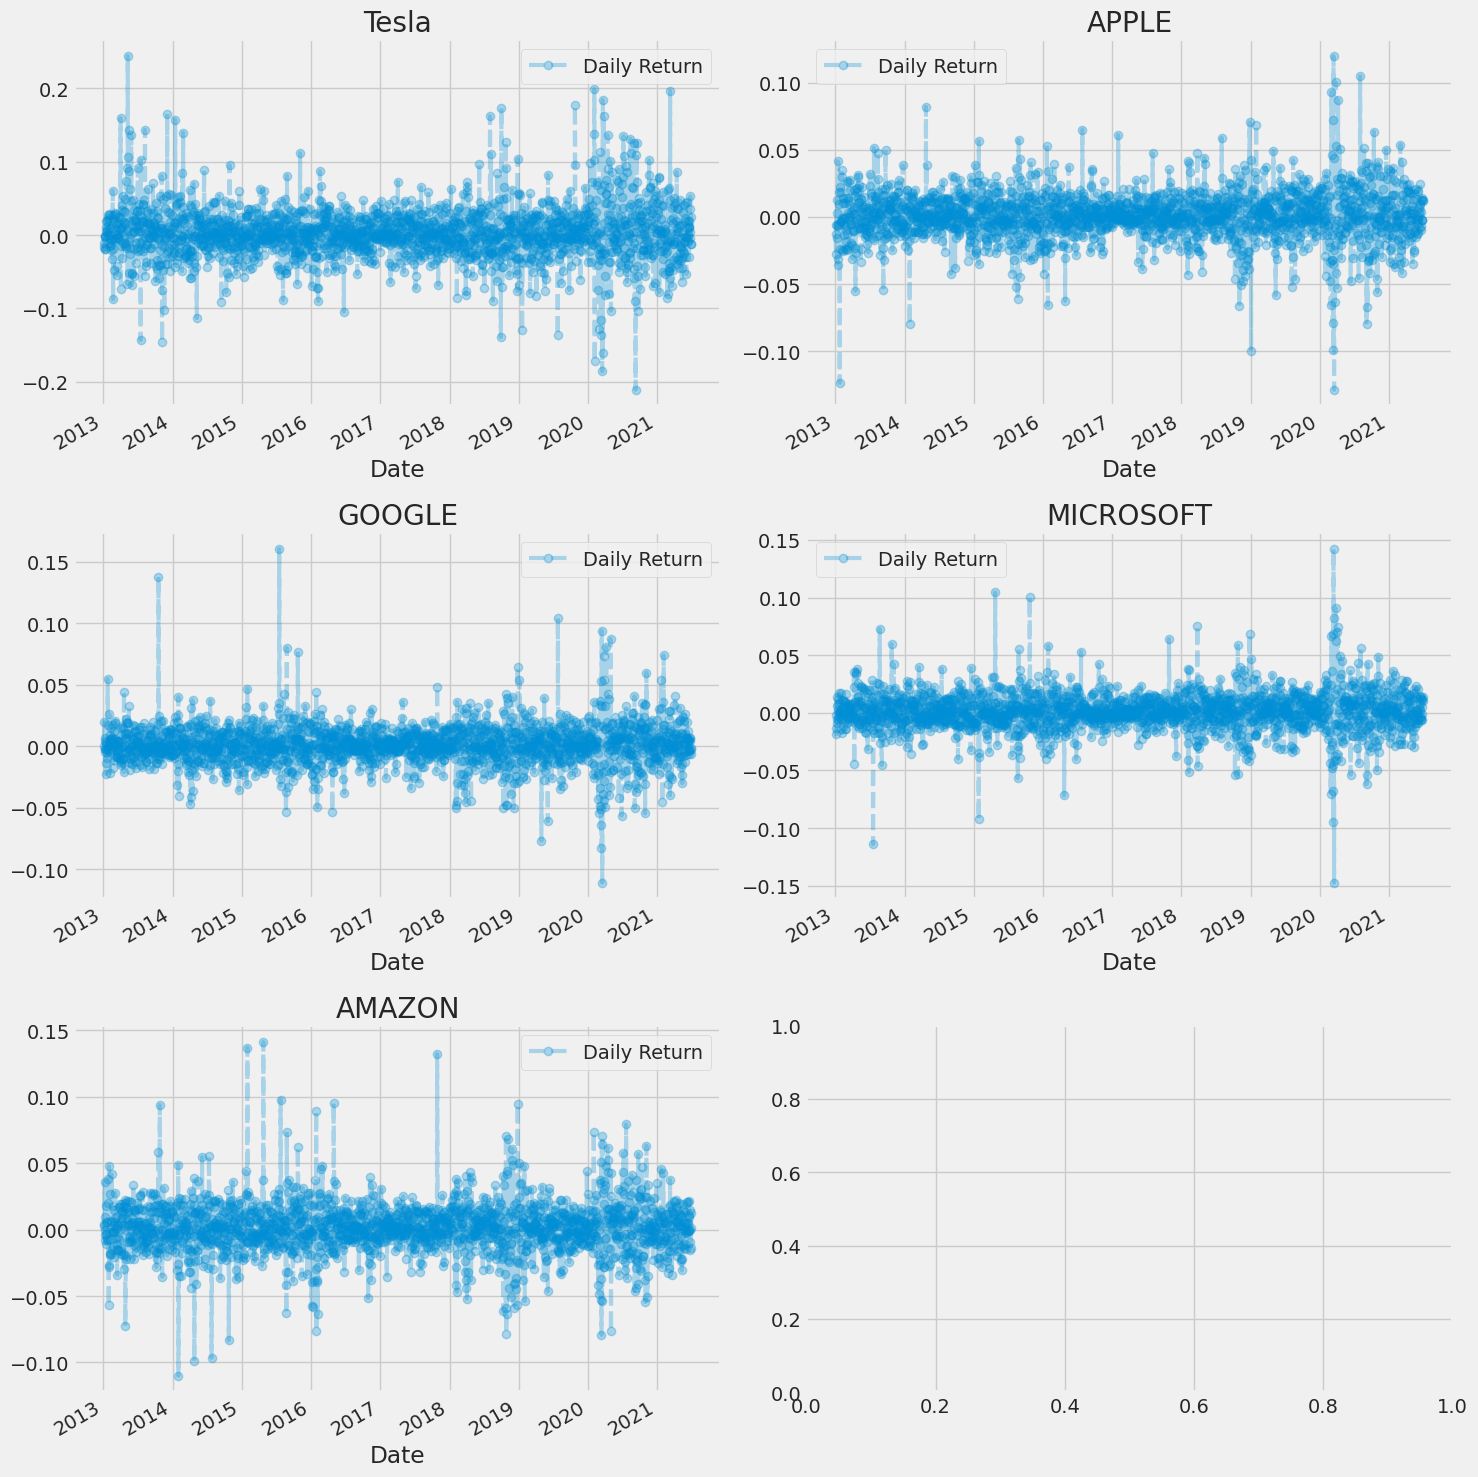

In [11]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[0,0].set_title('Tesla')

AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[0,1].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[1,0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[1,1].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[2,0].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

<ipython-input-12-238e4c855c7e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
<ipython-input-12-238e4c855c7e>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
<ipython-input

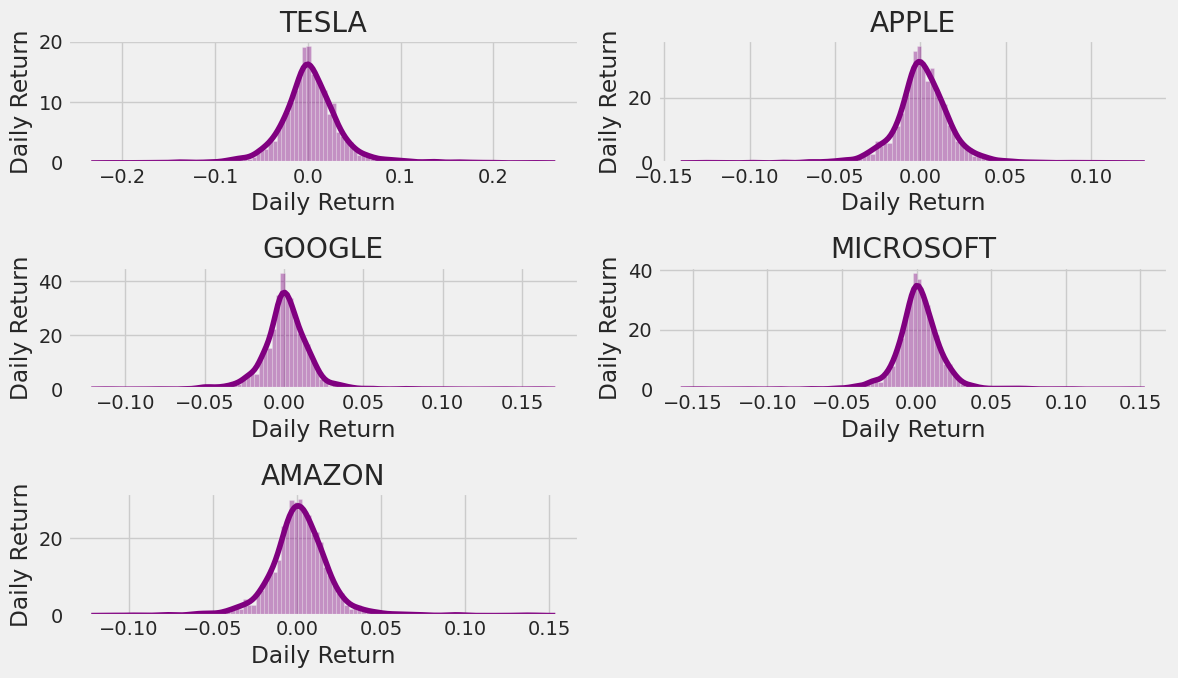

In [12]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

4. What was the correlation between different stocks closing prices?
Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [13]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download (tech_list, start, end)['Adj Close']

# Let's take a quick look
closing_df.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2013-01-02,16.747719,12.8655,18.013729,22.532850,2.357333
2013-01-03,16.536327,12.9240,18.024191,22.231001,2.318000
2013-01-04,16.075718,12.9575,18.380356,21.814934,2.293333
2013-01-07,15.981152,13.4230,18.300158,21.774137,2.289333
2013-01-08,16.024162,13.3190,18.264042,21.659924,2.245333


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Tesla stock.

In [14]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.013396,-0.016685
2013-01-04,-0.027854,0.002592,0.019760,-0.018716,-0.010642
2013-01-07,-0.005883,0.035925,-0.004363,-0.001870,-0.001744
2013-01-08,0.002691,-0.007748,-0.001974,-0.005245,-0.019220


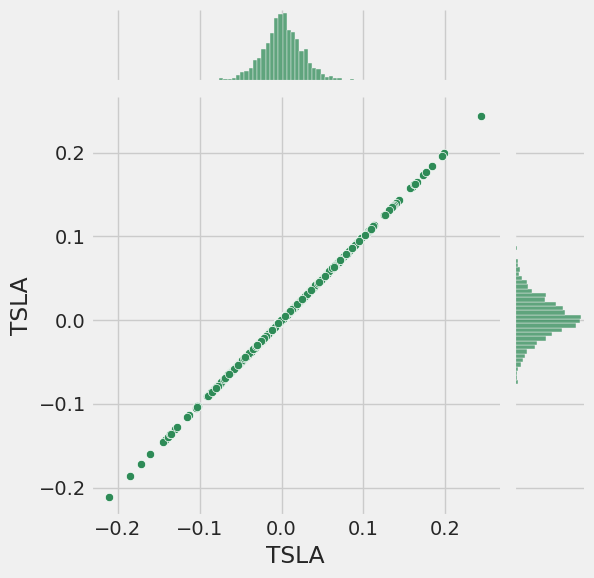

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='TSLA', y='TSLA', data=tech_rets, kind='scatter', color='seagreen')


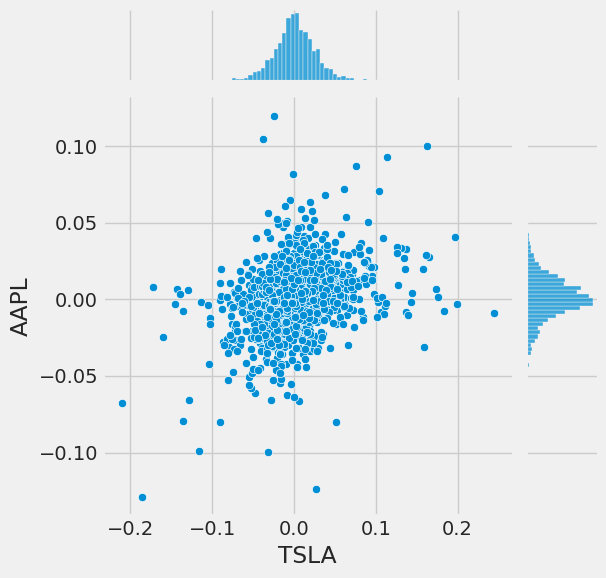

In [16]:
# We'll use joinplot to compare the daily returns of Tesla and Apple
sns.jointplot(x='TSLA', y='AAPL', data=tech_rets, kind='scatter')


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

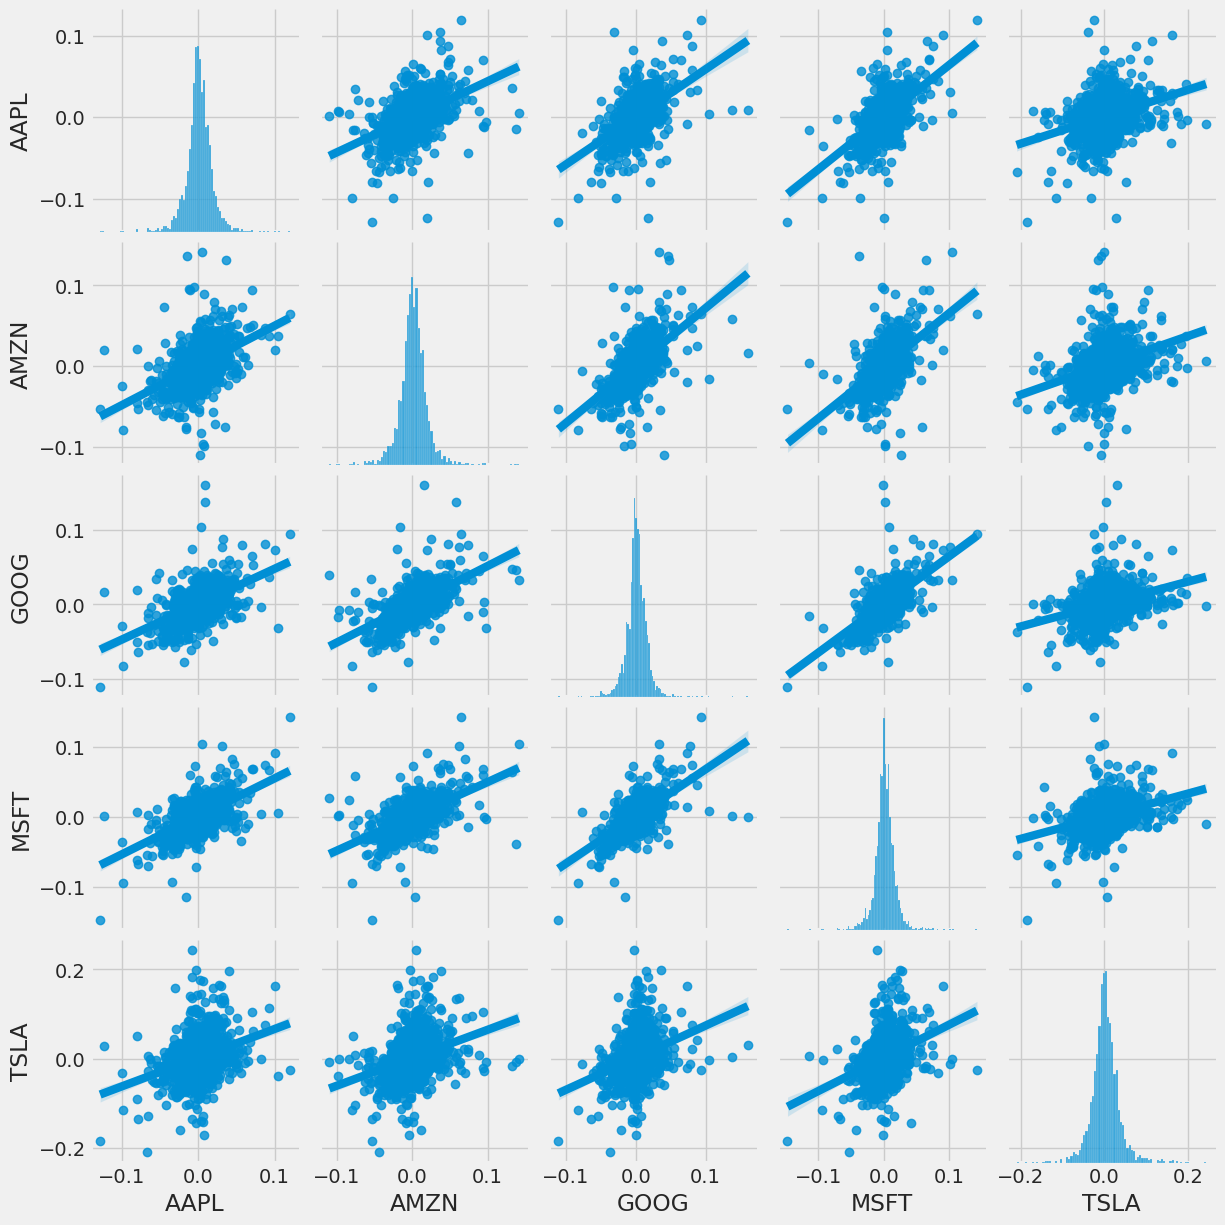

In [17]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg');

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Tesla and Apple daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

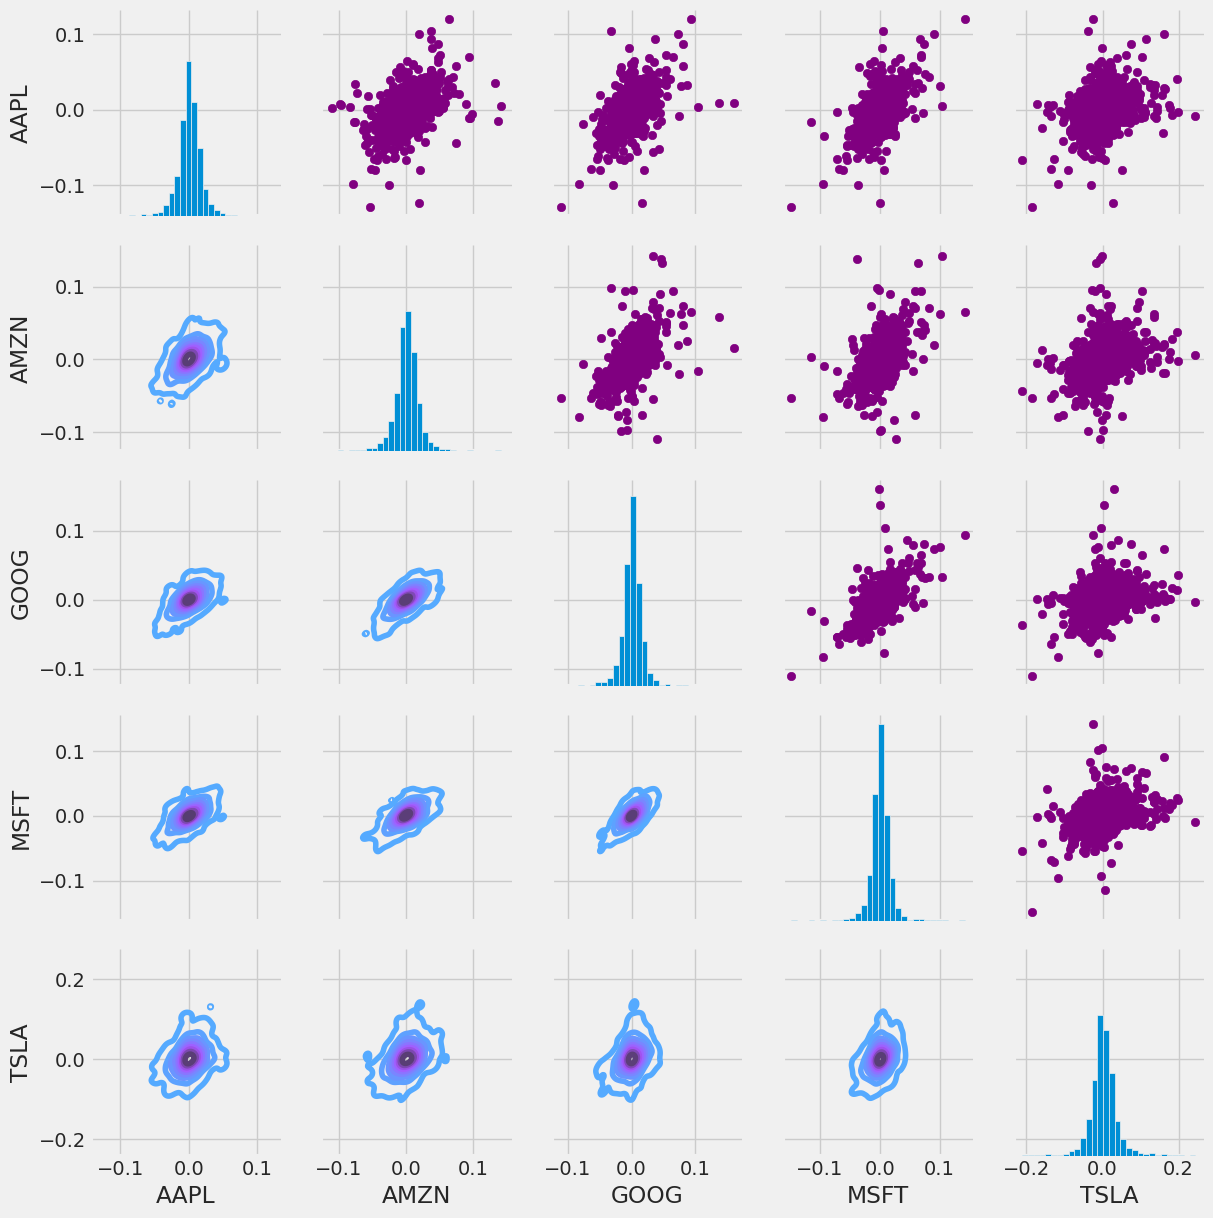

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

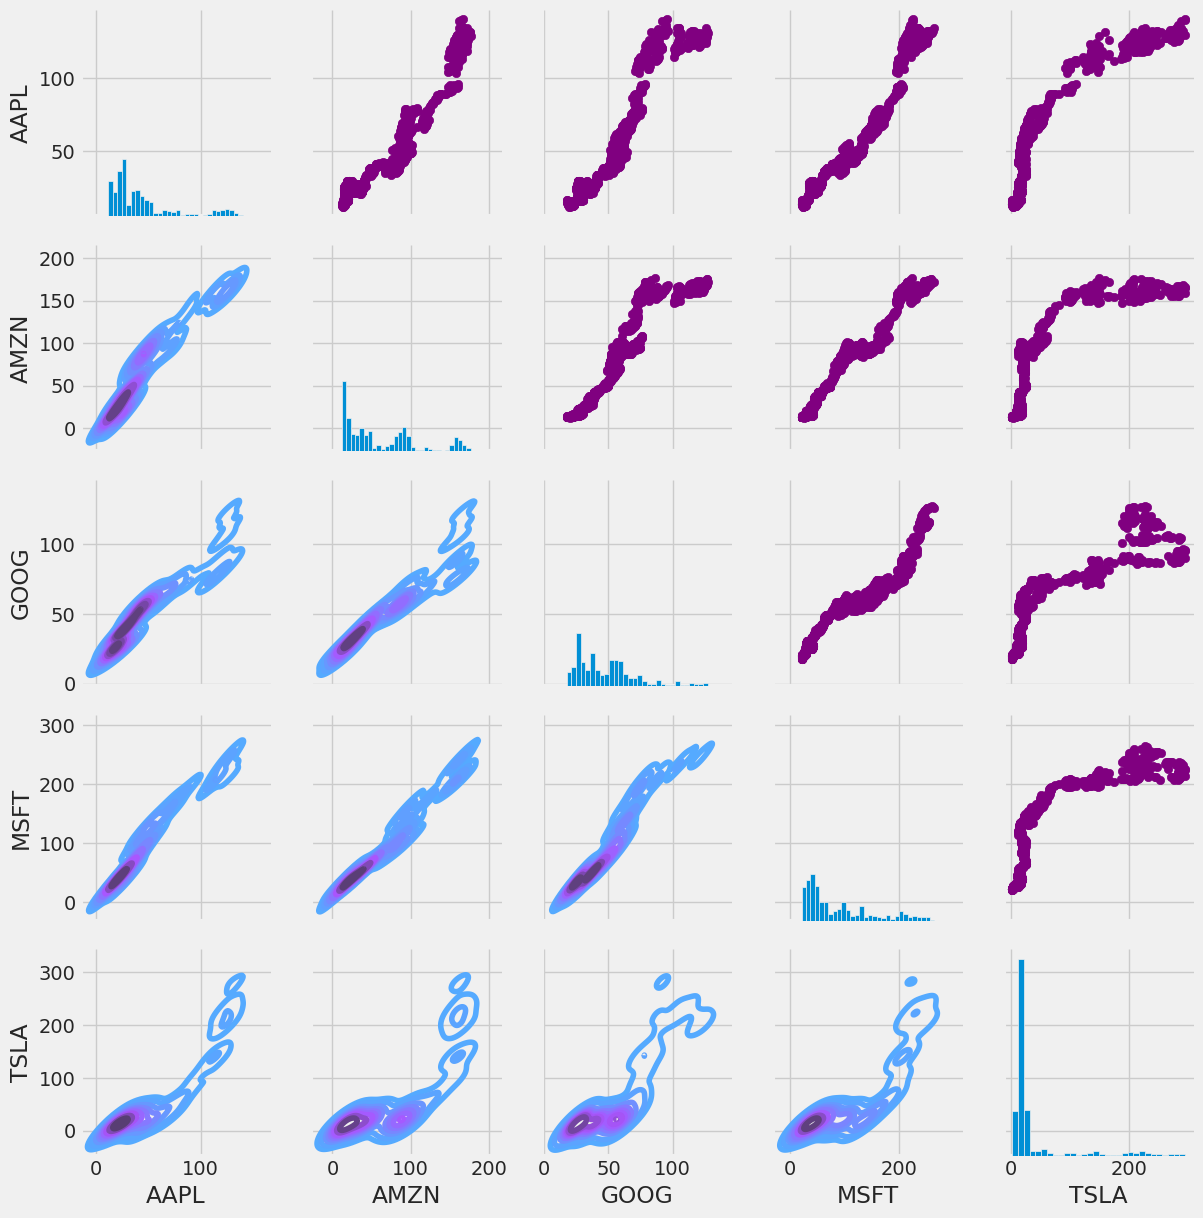

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<Axes: xlabel='Ticker', ylabel='Ticker'>

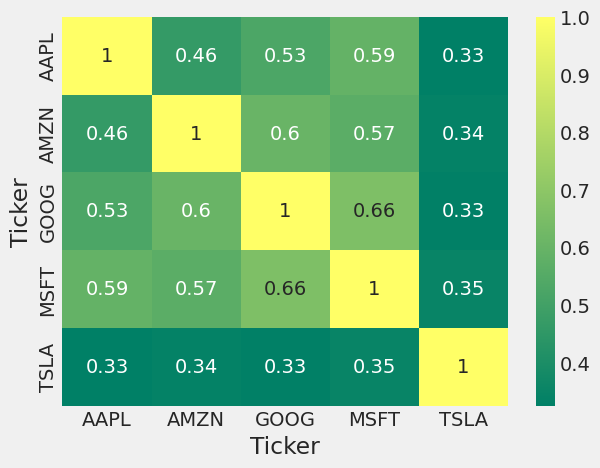

In [20]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

5. How much value do we put at risk by investing in a particular stock?
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

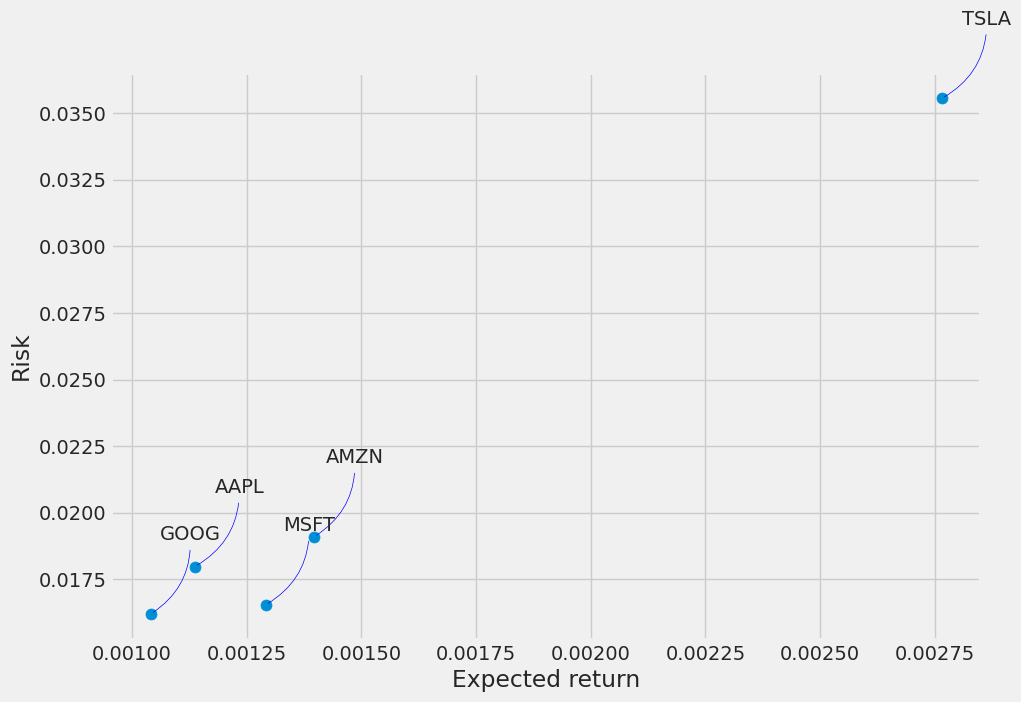

In [21]:
# Let's start by defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

6. Predicting the closing price stock price of Tesla:

In [22]:
# Get the stock quote
df = yf.download('TSLA', start=start, end=end)

# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...
2021-06-23,210.666672,219.066666,210.013336,218.856674,218.856674,93297600
2021-06-24,224.996674,232.539993,222.536667,226.606674,226.606674,137947200
2021-06-25,229.860001,231.270004,222.899994,223.956665,223.956665,97490100


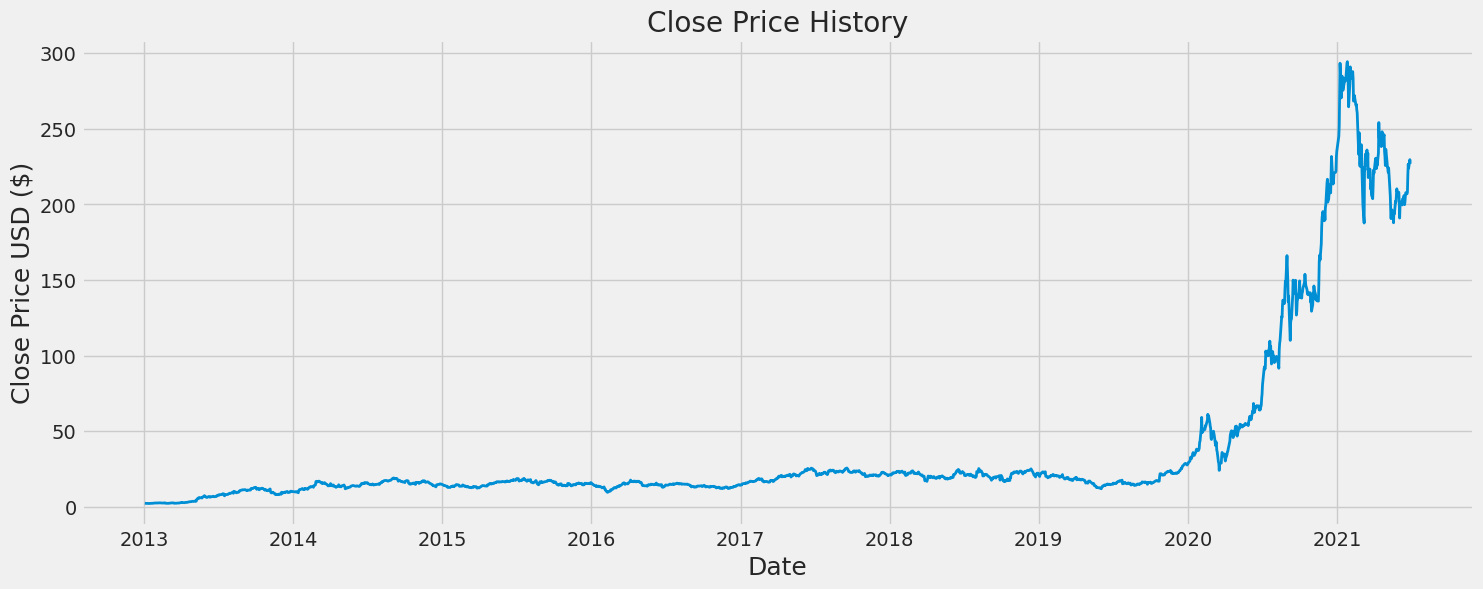

In [23]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2032

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.59035174e-04],
       [4.24411649e-04],
       [3.39984500e-04],
       ...,
       [7.59020996e-01],
       [7.78245014e-01],
       [7.69163515e-01]])

In [26]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i-5, 0])
    y_train.append(train_data[i-5:i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

[array([5.59035174e-04, 4.24411649e-04, 3.39984500e-04, 3.26293986e-04,
       1.75695883e-04, 1.66571050e-04, 1.41469190e-04, 0.00000000e+00,
       7.98614683e-05, 2.25896339e-04, 2.71531114e-04, 3.35422084e-04,
       3.67365529e-04, 5.20246064e-04, 7.05070861e-04, 9.30967200e-04,
       9.28683951e-04, 1.16827080e-03, 1.15001787e-03, 1.05190021e-03,
       1.04962104e-03, 1.22987934e-03, 1.10210067e-03, 1.19109023e-03,
       1.42839384e-03, 1.49913047e-03, 1.44436760e-03, 1.25726037e-03,
       1.13632736e-03, 1.26410603e-03, 1.22303368e-03, 9.42374465e-04,
       1.45349570e-03, 1.28464221e-03, 5.13401215e-04, 7.30168641e-04,
       3.35422084e-04, 3.46829349e-04, 4.99709885e-04, 4.38102164e-04,
       3.97029805e-04, 6.09235630e-04, 8.53384900e-04, 1.09069258e-03,
       1.21390884e-03, 1.26867172e-03, 1.41242415e-03, 1.41698657e-03,
       1.38504231e-03, 8.99022939e-04, 5.43065492e-04, 5.11117967e-04,
       4.95147468e-04, 6.93662779e-04, 7.07353293e-04])]
[array([0.00084654,

In [27]:

!pip install yfinance
!pip install darts
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from darts.models import (
    LinearRegressionModel,
    ExponentialSmoothing,
    ARIMA,
    RandomForest,
    Theta,
    RegressionEnsembleModel,
    NBEATSModel
)
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape, mse
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [3]:

# Additional stock data, which is correlated to Tesla stock, after research we found that NASDAQ is very correlated

tesla_df = yf.download(['TSLA'],
                      start='2013-01-02',
                      end='2021-06-30',
                      progress=False).reset_index()
nasdq_df = yf.download(['^IXIC'],
                      start='2013-01-02',
                      end='2021-06-30',
                      progress=False).reset_index()

# Events is a self made data for the major events and its effect on tesla stock over the years
events = pd.read_excel('tesla_tweed_pre.xlsx', sheet_name='tesla_tweets')[['Date', 'accum_value']]
events = events[events['accum_value']!=0]
nasdq_df.columns = ['Date', 'NSDQ-Open', 'NSDQ-High', 'NSDQ-Low', 'NSDQ-Close', 'NSDQ-Adj Close', 'NSDQ-Volume']
tesla_df.columns = ['Date', 'tesla-Open', 'tesla-High', 'tesla-Low', 'tesla-Close', 'tesla-Adj Close', 'tesla-Volume']
event_tesla_merge = pd.merge(tesla_df, events, how='left', on='Date')
data = pd.merge(event_tesla_merge, nasdq_df, how='left', on='Date')
data['accum_value']=data['accum_value'].fillna(0)

# Data transformation
def date_extraction(dataset):
    dataset['Date'] = pd.to_datetime(dataset['Date'])
    # dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year
    # dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
    # dataset['Day'] = dataset.Date.dt.day
    # dataset['DayOfWeek'] = dataset.Date.dt.dayofweek
    # dataset['WeekOfYear'] = dataset.Date.dt.weekofyear

    # dataset['Series'] = np.arange(1,len(data)+1)
date_extraction(data)
data.tail(2)

,Date,tesla-Open,tesla-High,tesla-Low,tesla-Close,tesla-Adj Close,tesla-Volume,accum_value,NSDQ-Open,NSDQ-High,NSDQ-Low,NSDQ-Close,NSDQ-Adj Close,NSDQ-Volume
2136,2021-06-28,223.880005,231.566666,223.440002,229.573334,229.573334,64884600,224.49,14417.80957,14505.190430,14417.200195,14500.509766,14500.509766,4283000000
2137,2021-06-29,228.216660,229.169998,225.296661,226.919998,226.919998,52143900,224.49,14509.19043,14535.969727,14471.379883,14528.330078,14528.330078,4901300000


In [4]:

data = data.filter(['Date', 'tesla-Close', 'accum_value'], axis=1)
data = data.iloc[1500:].reset_index(drop=True).fillna(method='bfill')
full_dates = pd.DataFrame(pd.date_range(start = '2018-12-17', end = '2021-06-29', freq = 'D'), columns=['Date'])
data_fill = pd.merge(full_dates, data, how='left', on='Date').fillna(method='bfill')
data_fill.tail(2)

,Date,tesla-Close,accum_value
924,2021-06-28,229.573334,224.49
925,2021-06-29,226.919998,224.49


In [5]:

data_fill.corr()

,Date,tesla-Close,accum_value
Date,1.000000,0.889475,0.933943
tesla-Close,0.889475,1.000000,0.963774
accum_value,0.933943,0.963774,1.000000


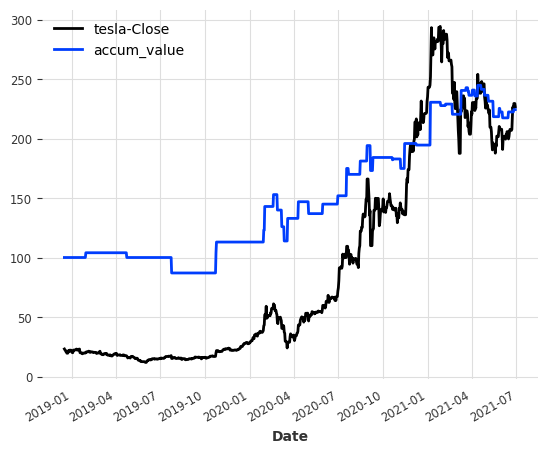

In [6]:

data_merged = TimeSeries.from_dataframe(data_fill, time_col = 'Date', value_cols = ['accum_value','tesla-Close'],
                                    fill_missing_dates=True, freq='d')
col = ['tesla-Close', 'accum_value']
data_merged[col].plot()

Scalling and Training / Validation split

In [7]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

# Changing our data to timeseries product for the darts library
data_ts = TimeSeries.from_dataframe(data_fill,
                                    time_col = 'Date',
                                    value_cols = 'tesla-Close',
                                    fill_missing_dates=True, freq='d')
covariates = TimeSeries.from_dataframe(data_fill,
                                    time_col = 'Date',
                                    value_cols = 'accum_value',
                                    fill_missing_dates=True, freq='d')

scaler_target = Scaler()
data_ts_transformed = scaler_target.fit_transform(data_ts)
train_transformed, val_transformed = data_ts_transformed.split_before(pd.Timestamp('20210615'))

scaler_covariate = Scaler()
covariate_transformed = scaler_covariate.fit_transform(covariates)
past_cov, future_cov = covariate_transformed.split_before(pd.Timestamp('20210615'))

Deep learning Models



Temporal convolutional netword Models

In [8]:
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

deeptcn = TCNModel(
    dropout=0.2,
    batch_size=32,
    n_epochs=20,
    optimizer_kwargs={'lr': 1e-3},
    random_state=0,
    input_chunk_length=100,
    output_chunk_length=30,
    kernel_size=3,
    num_filters=4,
    likelihood=GaussianLikelihood())

deeptcn.fit(series=train_transformed, past_covariates=past_cov, verbose=True)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | res_blocks    | ModuleList       | 492   
---------------------------------------------------
492       Trainable params
0         Non-trainable params
492       Total params
0.002     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


TCNModel(output_chunk_shift=0, kernel_size=3, num_filters=4, num_layers=None, dilation_base=2, weight_norm=False, dropout=0.2, batch_size=32, n_epochs=20, optimizer_kwargs={'lr': 0.001}, random_state=0, input_chunk_length=100, output_chunk_length=30, likelihood=GaussianLikelihood(prior_mu=None, prior_sigma=None, prior_strength=1.0, beta_nll=0.0))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 24.91%


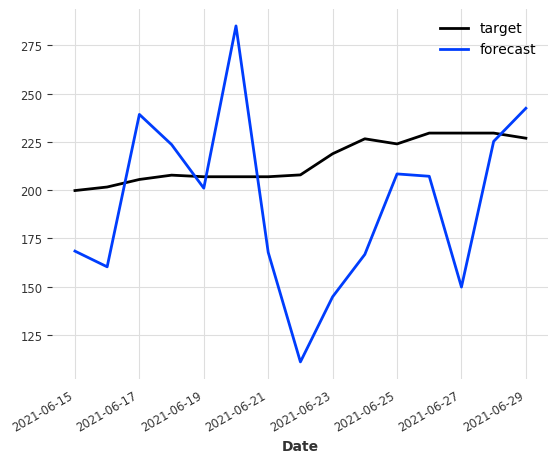

In [9]:
pred = deeptcn.predict(15, past_covariates=past_cov, num_samples=1)
pred_orig = scaler_target.inverse_transform(pred)

val_orig = scaler_target.inverse_transform(val_transformed)
val_orig.slice_intersect(pred_orig).plot(label='target')

pred_orig.plot(label='forecast')
training = scaler_target.inverse_transform(train_transformed)
print('MAPE = {:.2f}%'.format(mape(pred_orig, val_orig)))

In [10]:
pd.merge(pred_orig.pd_dataframe().rename(columns = {'tesla-Close':'Label'}), val_orig.pd_dataframe(), left_index=True, right_index=True)


component,Label,tesla-Close
Date,,
2021-06-15,168.402220,199.786667
2021-06-16,160.263441,201.623337
2021-06-17,239.247275,205.533340
2021-06-18,223.621229,207.770004
2021-06-19,201.028439,206.943329
2021-06-20,285.110160,206.943329
2021-06-21,167.772965,206.943329
2021-06-22,110.981665,207.903336
2021-06-23,144.727284,218.856674


In [11]:

from darts.metrics import mape, mase, mae, rmse

mape_score = mape(val_orig, pred_orig)
mae_score = mae(val_orig, pred_orig)
rmse_score = rmse(val_orig, pred_orig)

print('TCN model MAPE is: {}%'.format(round(mape_score)))
print('TCN model MAE is: {}'.format(round(mae_score, 2)))
print('TCN model RMSE is: {}'.format(round(rmse_score)))


TCN model MAPE is: 19%
TCN model MAE is: 40.94
TCN model RMSE is: 50


**NBEATS**

In [12]:

model = NBEATSModel(input_chunk_length=30, output_chunk_length=15, n_epochs=100, random_state=0)

model.fit([train_transformed, past_cov], verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
24.978    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=30, output_chunk_length=15, n_epochs=100, random_state=0)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

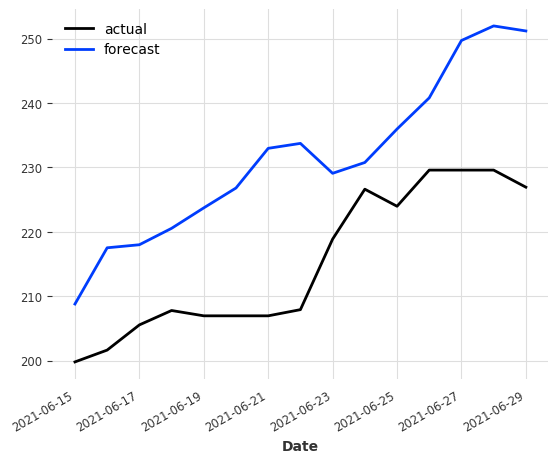

In [13]:
pred = model.predict(n=15, series=train_transformed)
pred_orig = scaler_target.inverse_transform(pred)
val_orig = scaler_target.inverse_transform(val_transformed)

val_orig.plot(label='actual')
pred_orig.plot(label='forecast')

plt.legend();

In [14]:
pd.merge(pred_orig.pd_dataframe().rename(columns = {'tesla-Close':'Label'}), val_orig.pd_dataframe(), left_index=True, right_index=True)


component,Label,tesla-Close
Date,,
2021-06-15,208.777671,199.786667
2021-06-16,217.508079,201.623337
2021-06-17,217.981560,205.533340
2021-06-18,220.529766,207.770004
2021-06-19,223.707517,206.943329
2021-06-20,226.792486,206.943329
2021-06-21,232.953095,206.943329
2021-06-22,233.718850,207.903336
2021-06-23,229.074020,218.856674


In [15]:

mape_score = mape(val_orig, pred_orig)
mae_score = mae(val_orig, pred_orig)
rmse_score = rmse(val_orig, pred_orig)

print('NBEATS model MAPE is: {}%'.format(round(mape_score)))
print('NBEATS model MAE is: {}'.format(round(mae_score, 2)))
print('NBEATS model RMSE is: {}'.format(round(rmse_score)))

NBEATS model MAPE is: 8%
NBEATS model MAE is: 16.19
NBEATS model RMSE is: 17
